In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The Brownian motion

The free particle is characterized for having no external potential goberning its motion. In the case of temperature and friction abscence the particle is moving in a uniform rectilineous trajectory. And when temperature and friction are present, we have nothing but a stochastic brownian particle or random walker characterized by magnitudes as diffusion.

In [2]:
from uibcdf_systems import FreeParticle

molecular_system = FreeParticle(n_particles=1, mass='64.0 amu')

## Isolated free particle

In [3]:
from uibcdf_systems.tools import langevin
from openmm import unit

In [4]:
coordinates = np.zeros([1, 3], np.float32) * unit.nanometers
velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds
velocities[0,0] = 0.10 * unit.nanometers/unit.picoseconds

molecular_system.set_coordinates(coordinates)
molecular_system.set_velocities(velocities)

In [5]:
traj_dict = langevin(molecular_system,
                     friction=0.0/unit.picoseconds,
                     temperature=0.0*unit.kelvin,
                     time=0.2*unit.nanoseconds,
                     saving_timestep=0.10*unit.picoseconds,
                     integration_timestep=0.01*unit.picoseconds)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 18270.69it/s]


In [6]:
traj_dict.keys()

dict_keys(['time', 'coordinates', 'potential_energy', 'kinetic_energy', 'box'])

We can plot the trajectory of the system along the $X$ axis:

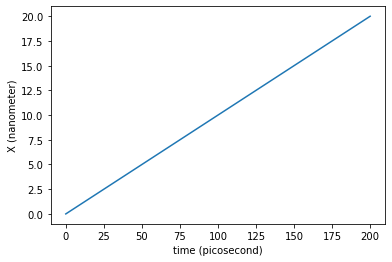

In [7]:
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,0])
plt.xlabel('time ({})'.format(traj_dict['time'].unit))
plt.ylabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.show()

# With dissipation

In [8]:
traj_dict = langevin(molecular_system,
                     friction=1.0/unit.picoseconds,
                     temperature=0.0*unit.kelvin,
                     time=0.2*unit.nanoseconds,
                     saving_timestep=0.10*unit.picoseconds,
                     integration_timestep=0.01*unit.picoseconds)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 17335.62it/s]


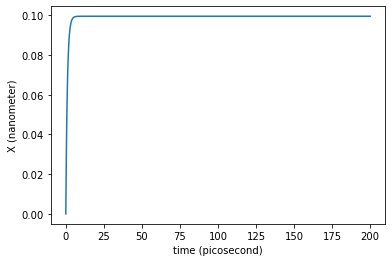

In [9]:
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,0])
plt.xlabel('time ({})'.format(traj_dict['time'].unit))
plt.ylabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.show()

## With fluctuation

In [10]:
traj_dict = langevin(molecular_system,
                     friction=1.0/unit.picoseconds,
                     temperature=300.0*unit.kelvin,
                     time=0.2*unit.nanoseconds,
                     saving_timestep=0.10*unit.picoseconds,
                     integration_timestep=0.01*unit.picoseconds)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 13657.11it/s]


We represent now the stochastic trajectory of our free particle along the axis $X$ in time:

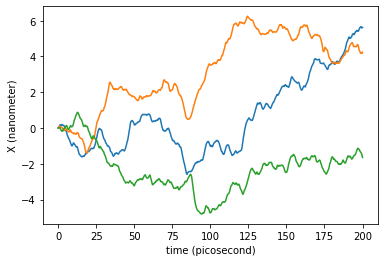

In [11]:
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,0])
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,1])
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,2])
plt.xlabel('time ({})'.format(traj_dict['time'].unit))
plt.ylabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.show()

Or over the plane $X,Y$:

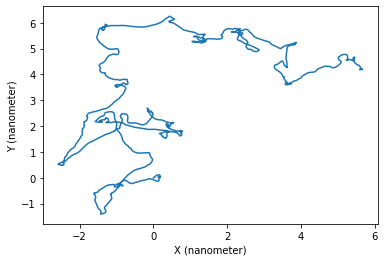

In [12]:
plt.plot(traj_dict['coordinates'][:,0,0], traj_dict['coordinates'][:,0,1])
plt.xlabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.ylabel('Y ({})'.format(traj_dict['coordinates'].unit))
plt.show()